In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
play=pd.read_csv("googleplaystore.csv")
user=pd.read_csv("googleplaystore_user_reviews.csv")


In [3]:
play.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
user.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
play['Rating'].value_counts()


4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [7]:
user.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [8]:
play.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<Axes: xlabel='Sentiment', ylabel='count'>

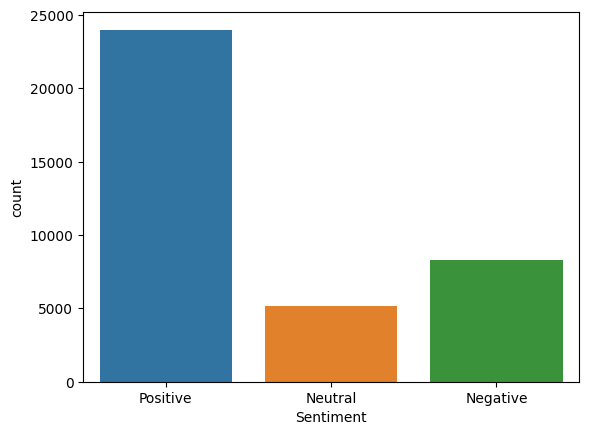

In [9]:
sns.countplot(data=user, x='Sentiment')


<Axes: xlabel='Sentiment_Polarity', ylabel='Count'>

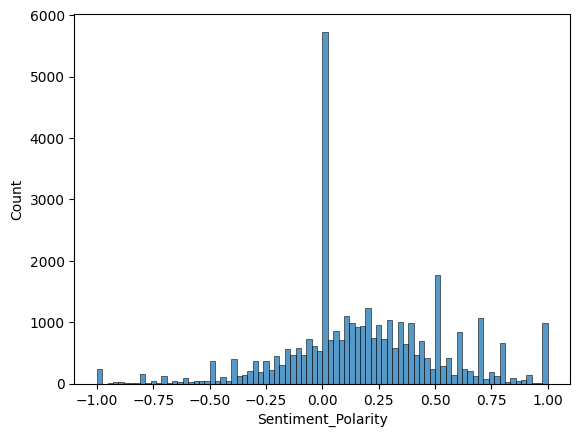

In [10]:
sns.histplot(data=user, x='Sentiment_Polarity')


<Axes: xlabel='Sentiment_Subjectivity', ylabel='Count'>

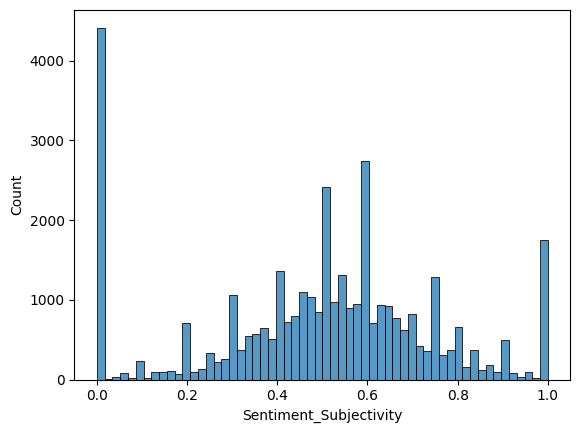

In [11]:
# Visualize Sentiment Subjectivity distribution
sns.histplot(data=user, x='Sentiment_Subjectivity')


C:\Users\Dell\AppData\Local\Temp\ipykernel_12284\4168670104.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = user.corr()


<Axes: >

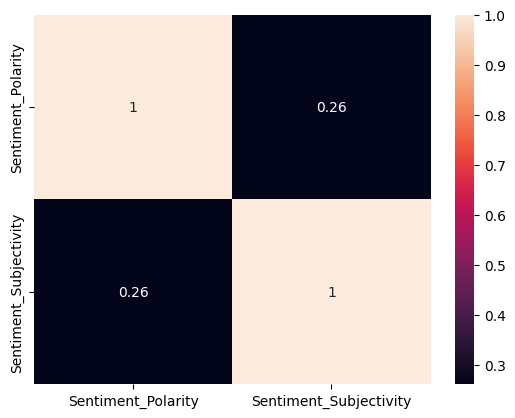

In [12]:
correlation_matrix = user.corr()
sns.heatmap(correlation_matrix, annot=True)


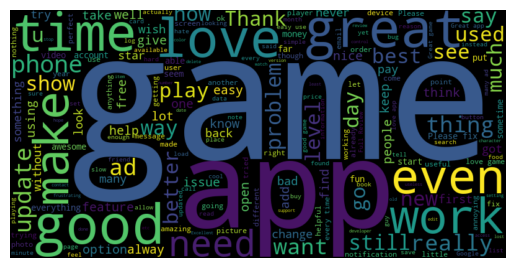

In [13]:
from wordcloud import WordCloud
text = ' '.join(user['Translated_Review'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<Axes: xlabel='Rating', ylabel='Count'>

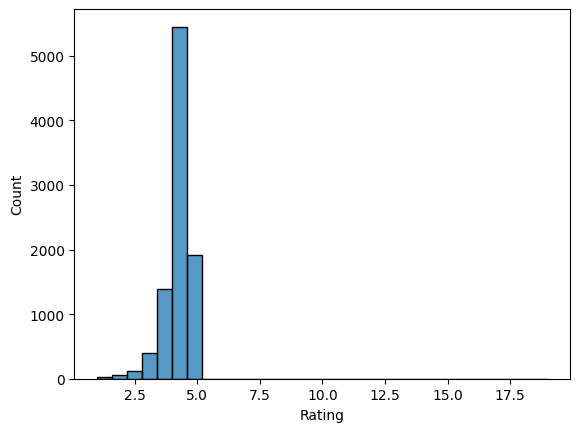

In [14]:
# Visualize Rating distribution
sns.histplot(data=play, x='Rating', bins=30)


<Axes: xlabel='count', ylabel='Category'>

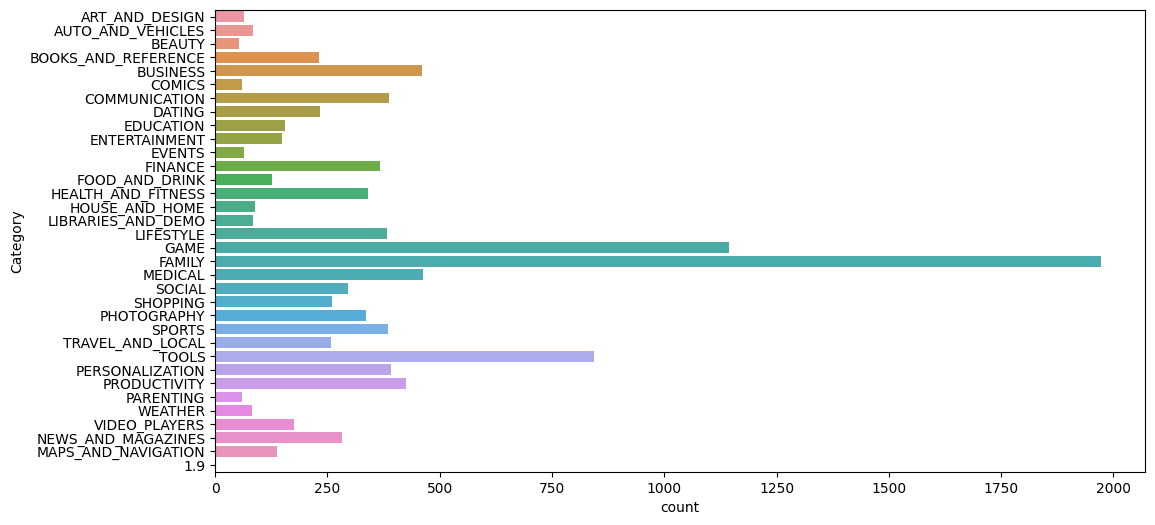

In [15]:
# Visualize Category distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=play, y='Category')


In [16]:
# Visualize Size distribution (convert to numeric first)
play['Size'] = play['Size'].str.replace('M', '').str.replace(
    'k', '').replace('Varies with device', np.nan).astype(float)
sns.histplot(data=play, x='Size', bins=30)


ValueError: could not convert string to float: '1,000+'

In [ ]:
# Visualize Installs distribution
play['Installs'] = play['Installs'].str.replace(
    ',', '').str.replace('+', '').astype(int)
sns.histplot(data=play, x='Installs', bins=30)


C:\Users\Dell\AppData\Local\Temp\ipykernel_20108\1465208238.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ',', '').str.replace('+', '').astype(int)


ValueError: invalid literal for int() with base 10: 'Free'

<Axes: xlabel='Content Rating', ylabel='count'>

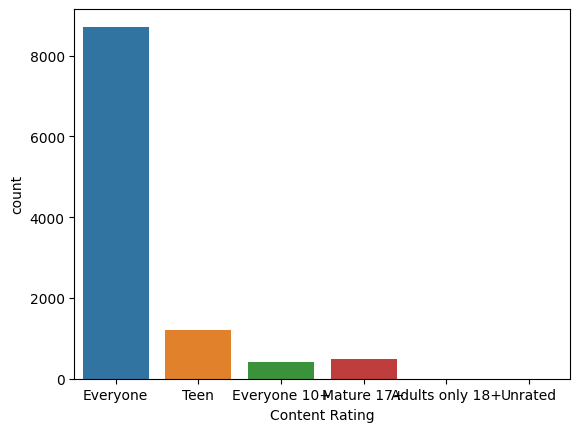

In [ ]:
# Visualize Content Rating distribution
sns.countplot(data=play, x='Content Rating')


<Axes: xlabel='count', ylabel='Genres'>

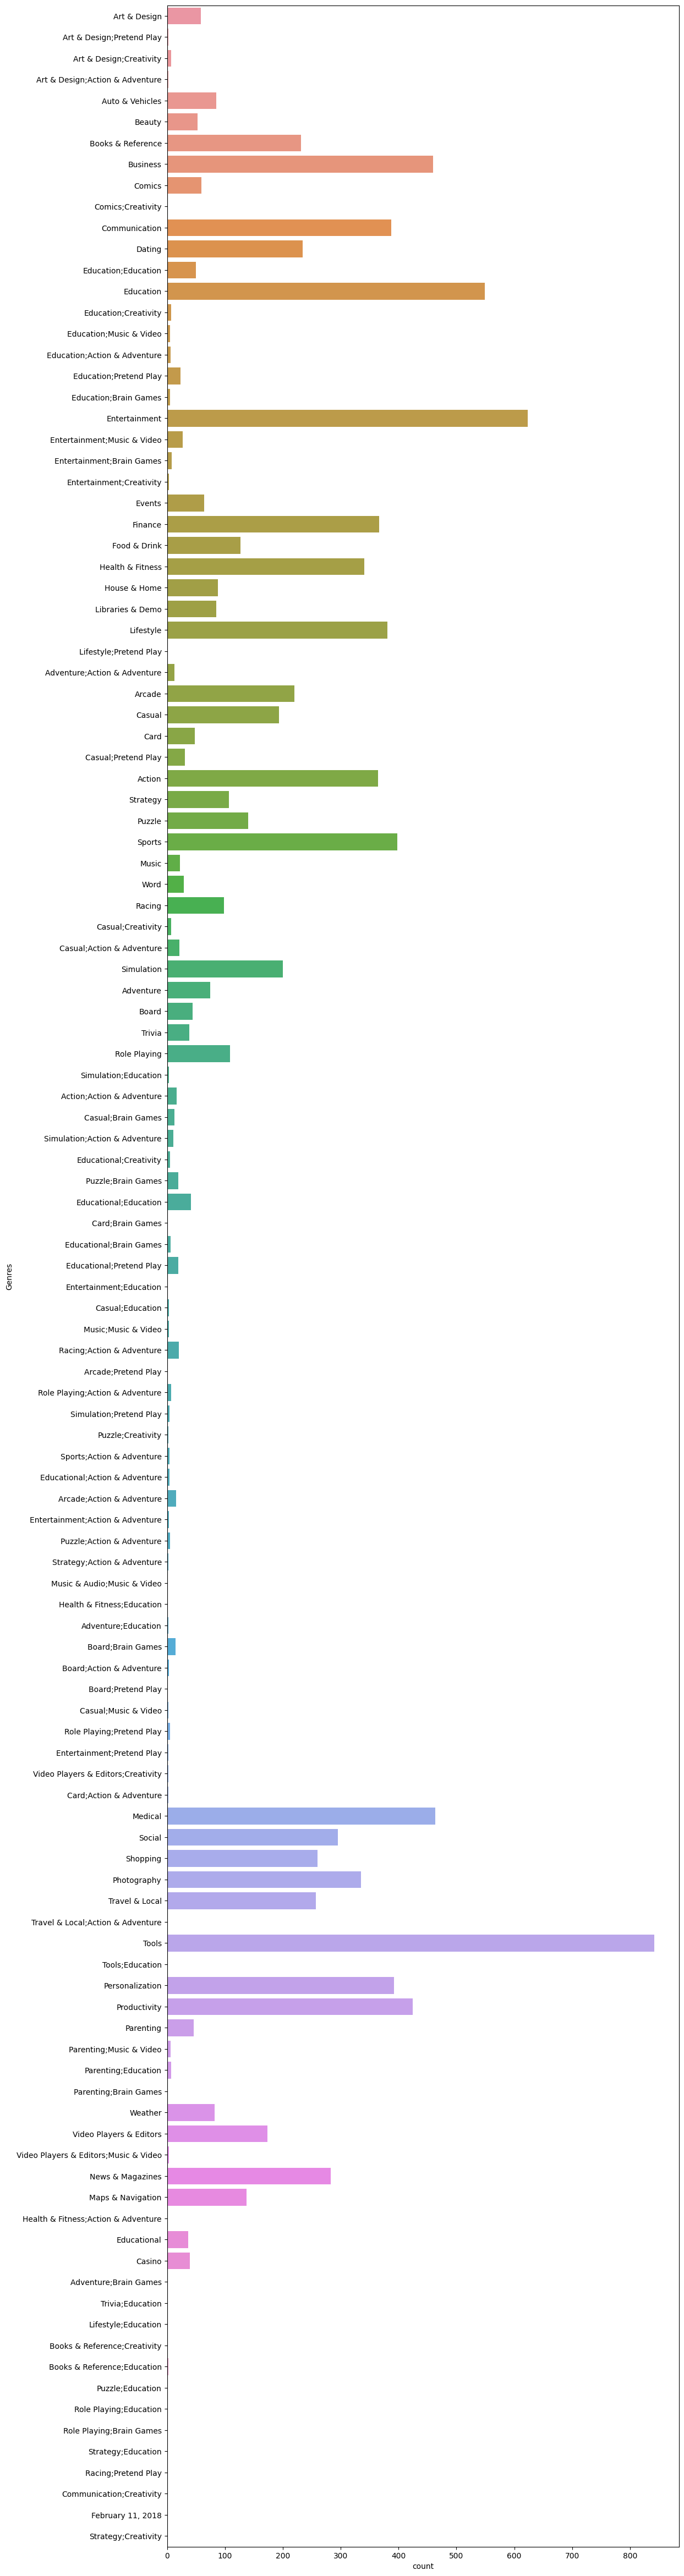

In [ ]:
# Visualize Genres distribution
plt.figure(figsize=(12, 60))
sns.countplot(data=play, y='Genres')


C:\Users\Dell\AppData\Local\Temp\ipykernel_15200\1435900381.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = play.corr()


<Axes: >

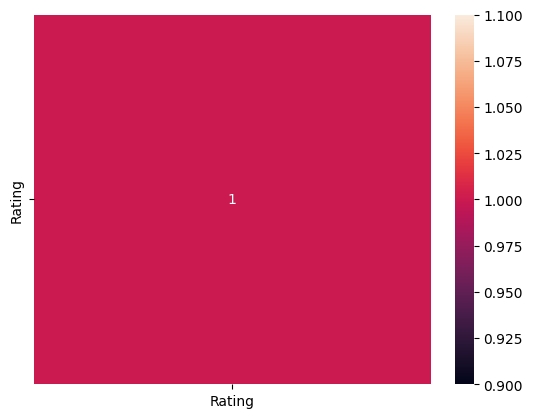

In [ ]:
# Check for correlations
correlation_matrix = play.corr()
sns.heatmap(correlation_matrix, annot=True)


In [ ]:
# Date analysis (optional)
# Convert 'Last Updated' to datetime
play['Last Updated'] = pd.to_datetime(play['Last Updated'])
# Visualize distribution of 'Last Updated'
plt.figure(figsize=(12, 6))
sns.histplot(data=play, x='Last Updated', bins=30)


ParserError: day is out of range for month: 1.0.19 present at position 1348

<Axes: xlabel='count', ylabel='Android Ver'>

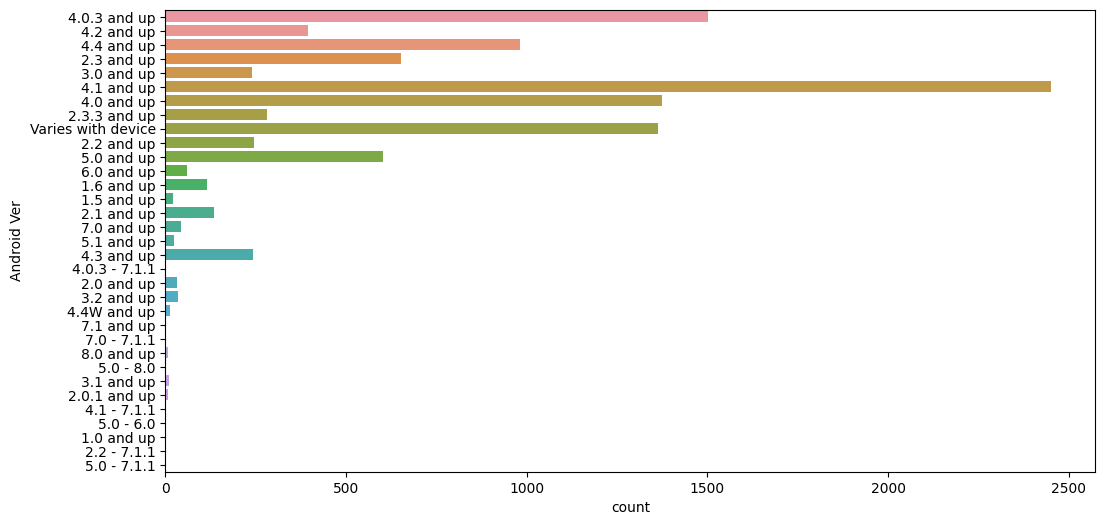

In [ ]:
# Version analysis (optional)
# Visualize distribution of 'Android Ver' or 'Current Ver' (as needed)
plt.figure(figsize=(12, 6))
sns.countplot(data=play, y='Android Ver')
